# Geoprocessing with GeoPanda vice PyQGIS

1. Import the raw potential explosion site (PES) layer data.
2. Read the PES data into a GeoDataframe.
3. Calculate the QDs and add them as new columns in the GeoDataframe.
4. Create buffer geometry columns for each QD based on the respective calculated QD.
5. Create new GeoDataframes for each QD buffer with the geometry of the respective QD buffer.
6. Export the GeoDataframes to layers within a single output Geopackage file.
7. Import the Geopackage output file into QGIS.

## Setup and Data Download

In [1]:
try:
    import geopandas
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        !apt install libspatialindex-dev -qq
        !pip install fiona shapely pyproj rtree --quiet
        !pip install geopandas --quiet
    else:
        print('geopandas not found, please install via conda in your environment')

In [2]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
input_file = 'pes_initial_data.gpkg'
input_path = os.path.join(data_folder, input_file)
pes_gdf = gpd.read_file(input_path)

In [5]:
pes_gdf

,facilitynum,neq_1_1,typecode,blast_dist_1_hd_1_1,geometry
0,1,50000.0,AGM,16.21,"POLYGON ((407055.403 70063.269, 407067.371 700..."
1,2,25000.0,AGM,10.23,"POLYGON ((407096.332 70121.079, 407098.834 701..."
2,3,100000.0,AGM,20.42,"POLYGON ((407020.443 70117.862, 407026.996 701..."
3,4,500.0,EOL,2.78,"POLYGON ((406928.046 70046.848, 406923.105 700..."


### Visualize the layer

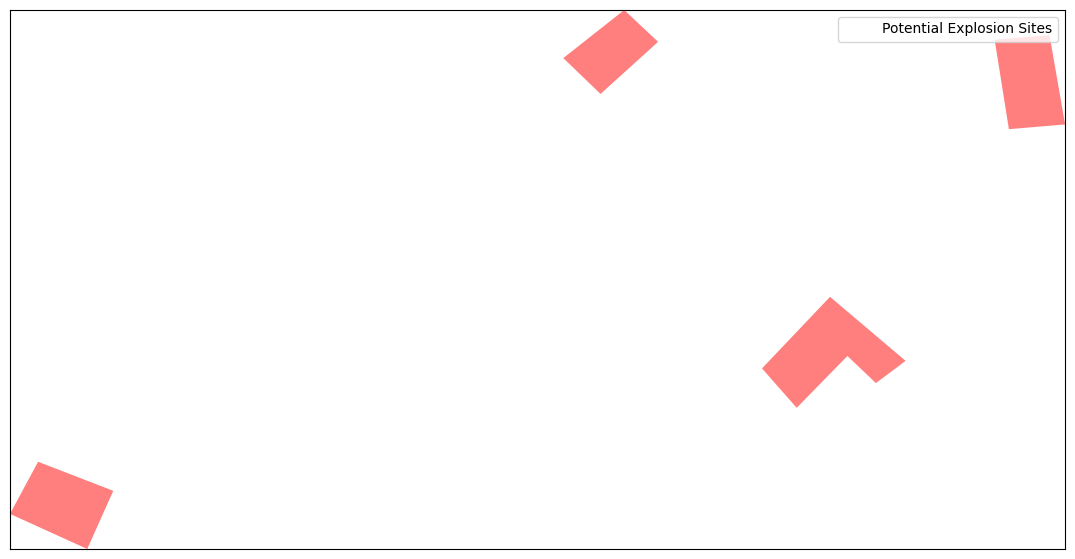

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
pes_gdf.plot(ax=ax, color='red', alpha=0.5)

minx, miny, maxx, maxy = pes_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

legend_elements = [
    plt.plot([],[], color='red', alpha=0.5, label='Potential Explosion Sites', ls='')[0]]
ax.legend()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Check the CRS of the GDF. (Make sure we are in a projected CRS so that we can perform the buffer operation, otherwise we need to reproject into one first.)

In [7]:
pes_gdf.crs

<Projected CRS: EPSG:6487>
Name: NAD83(2011) / Maryland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Maryland - counties of Allegany; Anne Arundel; Baltimore; Calvert; Caroline; Carroll; Cecil; Charles; Dorchester; Frederick; Garrett; Harford; Howard; Kent; Montgomery; Prince Georges; Queen Annes; Somerset; St Marys; Talbot; Washington; Wicomico; Worcester.
- bounds: (-79.49, 37.97, -74.97, 39.73)
Coordinate Operation:
- name: SPCS83 Maryland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Geodataframe analysis

### Import qdcalc module

In [8]:
# Import sys to add the path to qdcalc.py 
import sys
# Make sure qdcalc.py is in the path.
sys.path.append("/Users/josh/github/qdmap/qdmap/")


In [9]:
# Import the qdcalc module with all of the QD functions already defined.
import qdcalc as qd

In [11]:
# # add the other functions.
# pes_gdf['hd_1_1_bd_2'] = pes_gdf.neq_1_1.apply(qd.bd2)
# pes_gdf['hd_1_1_bd_3'] = pes_gdf.neq_1_1.apply(qd.bd3)

# pes_gdf = pes_gdf.round({'hd_1_1_bd_2': 2, 'hd_1_1_bd_3': 2})
# pes_gdf.head()

In [12]:
pes_gdf.head()

,facilitynum,neq_1_1,typecode,blast_dist_1_hd_1_1,geometry
0,1,50000.0,AGM,16.21,"POLYGON ((407055.403 70063.269, 407067.371 700..."
1,2,25000.0,AGM,10.23,"POLYGON ((407096.332 70121.079, 407098.834 701..."
2,3,100000.0,AGM,20.42,"POLYGON ((407020.443 70117.862, 407026.996 701..."
3,4,500.0,EOL,2.78,"POLYGON ((406928.046 70046.848, 406923.105 700..."


In [15]:
# Automate this by looping through a list of functions.
# TODO add the rest of the functions 
func_list = [
    qd.bd1, 
    qd.bd2, 
    qd.bd3,
    qd.bd4,
    qd.bd5,
    qd.bd6,
    qd.bd7,
    qd.bd8,
    qd.bd9,
    qd.bd10,
    qd.bd11,
    qd.bd12,
    qd.bd13,
    qd.bd14,
    qd.bd15,
    qd.bd16,
    qd.bd17,
    qd.bd18,
    qd.bd19,
    qd.bd20,
    qd.bd21,
    qd.bd22,
    qd.bd23,
    qd.bd24,
    qd.bd25,
    qd.bd26,
    qd.bd27,
    qd.bd28,
    qd.bd29,
    qd.bd30,
    qd.bd31,
    qd.bd32,
    qd.bd33,
    qd.bd34,
    qd.bd36,
    ]
    
# loop through the list of functions and add columns based on HD 1.1 NEQ
for func in func_list:
    new_col_name = 'hd_1_1_' + func.__name__  # get the name of the function
    pes_gdf[new_col_name] = pes_gdf.neq_1_1.apply(func)  # apply the function with NEQ 1.1 and create a new column


In [16]:
pes_gdf.head()

,facilitynum,neq_1_1,typecode,blast_dist_1_hd_1_1,geometry,hd_1_1_bd1,hd_1_1_bd2,hd_1_1_bd3,hd_1_1_bd4,hd_1_1_bd5,...,hd_1_1_bd26,hd_1_1_bd27,hd_1_1_bd28,hd_1_1_bd29,hd_1_1_bd30,hd_1_1_bd31,hd_1_1_bd32,hd_1_1_bd33,hd_1_1_bd34,hd_1_1_bd36
0,1,50000.0,AGM,16.21,"POLYGON ((407055.403 70063.269, 407067.371 700...",16.209739,22.104189,18.420157,29.472252,40.524346,...,545.236662,589.445040,663.125670,736.806300,817.854993,817.854993,921.007875,1031.528820,1326.251340,1635.709985
1,2,25000.0,AGM,10.23,"POLYGON ((407096.332 70121.079, 407098.834 701...",10.234062,17.544106,14.620089,23.392142,32.164195,...,432.754625,467.842838,526.323193,584.803548,649.131938,649.131938,731.004435,818.724967,1052.646386,1298.263876
2,3,100000.0,AGM,20.42,"POLYGON ((407020.443 70117.862, 407026.996 701...",20.422991,27.849533,23.207944,37.132711,51.057477,...,686.955147,742.654213,835.485990,928.317767,1030.432721,1030.432721,1160.397208,1299.644873,1670.971980,2060.865442
3,4,500.0,EOL,2.78,"POLYGON ((406928.046 70046.848, 406923.105 700...",2.777952,3.174802,3.968503,6.349604,8.730706,...,62.996052,126.992084,76.855184,158.740105,176.201517,94.494079,198.425131,119.062539,153.080408,188.988157



### Round the QD columns to 2 decimal places
pes_gdf = pes_gdf.round({'hd_1_1_bd_1': 2})


In [ ]:
# create buffer geometry GeoSeries based on newly computed QDs
qd_functions = {
    'hd_1_1_bd_1': pes_gdf.hd_1_1_bd_1,
    'hd_1_1_bd_2': pes_gdf.hd_1_1_bd_2,
    'hd_1_1_bd_3': pes_gdf.hd_1_1_bd_3}

# Add the GeoSeries to the geodataframe with a loop
for qd_type, distance in qd_functions.items():
    buffer_name = qd_type + '_buff_geom'
    pes_gdf[buffer_name] = pes_gdf.buffer(
        distance,
        resolution=40,
        cap_style=1,
        join_style=1,
        mitre_limit=2)

qd_functions.keys()


In [ ]:
pes_gdf.head()

In [ ]:
ax = pes_gdf["geometry"].plot()
pes_gdf["hd_1_1_bd_1_buff_geom"].plot(ax=ax, color="red", alpha=0.5)
pes_gdf["hd_1_1_bd_2_buff_geom"].plot(ax=ax, color="purple", alpha=0.5)


In [ ]:
output_file = 'processed_data.gpkg'
output_path = os.path.join(output_folder, output_file)


# Example code from https://gis.stackexchange.com/questions/375577/how-do-i-write-out-a-mixed-geometry-geodataframe-to-a-geopackage
# *** How to export a GDF with multiple geometries to separate layers in the same geopackage file.

# for geomtype in pes_gdf.geom_type.unique():
#    pes_gdf[pes_gdf.geom_type == geomtype].to_file(output_path, driver="GPKG", layer=geomtype)

In [ ]:
pes_gdf.geometry

In [ ]:
qd_functions.keys()

In [ ]:
# Make a list of the new buffered geometries
qd_function_key_list = list(qd_functions.keys())
string_suffix = '_buff_geom'
buffer_geometries = [x + string_suffix for x in qd_function_key_list]

# Create a dictionary so I can grab both values for exporting
qd_buffer_dict = dict(zip(buffer_geometries, qd_function_key_list))

print(qd_buffer_dict)

#

In [ ]:
# I need more than just the geometry. 
# To select multiple columns, use a list of column names within the selection brackets [].

for buffer_geometry in buffer_geometries:
   pes_gdf[buffer_geometry].to_file(output_path, driver="GPKG", layer=buffer_geometry)